<a href="https://colab.research.google.com/github/gift-is-coding/AiLearning/blob/master/Models_North_money_on_A300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tushare

     |████████████████████████████████| 215kB 3.3MB/s 
     |████████████████████████████████| 204kB 10.8MB/s 
     |████████████████████████████████| 133kB 8.8MB/s 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
import tushare as ts
token='输入你的token'
pro=ts.pro_api(token)
#获取交易日历
def get_cal_date(start,end):
    cal_date=pro.trade_cal(exchange='', start_date=start, end_date=end)
    cal_date=cal_date[cal_date.is_open==1]
    dates=cal_date.cal_date.values
    return dates

In [4]:
#获取北向资金数据
def get_north_money(start,end):
    #获取交易日历
    dates=get_cal_date(start,end)
    #tushare限制流量，每次只能获取300条记录
    df=pro.moneyflow_hsgt(start_date=start, end_date=end)
    #拆分时间进行拼接，再删除重复项
    for i in range(0,len(dates)-300,300):
        d0=pro.moneyflow_hsgt(start_date=dates[i], end_date=dates[i+300])
        df=pd.concat([d0,df])
        #删除重复项
        df=df.drop_duplicates()
        df.index=pd.to_datetime(df.trade_date)
        df=df.sort_index()
    return df

In [5]:
#获取指数数据
def get_index_data(code,start,end):
    index_df = pro.index_daily(ts_code=code, start_date=start,end_date=end)
    index_df.index=pd.to_datetime(index_df.trade_date)
    index_df=index_df.sort_index()
    return index_df

In [ ]:
#获取指数数据
#常用大盘指数
indexs={'上证综指': '000001.SH','深证成指': '399001.SZ','沪深300': '000300.SH',
       '创业板指': '399006.SZ','上证50': '000016.SH','中证500': '000905.SH',
       '中小板指': '399005.SZ','上证180': '000010.SH'}
start='20141117'
end='20200812'
index_data=pd.DataFrame()
for name,code in indexs.items():
    index_data[name]=get_index_data(code,start,end)['close']
#index_data.tail()

In [7]:
#累计收益
(index_data/index_data.iloc[0]).plot(figsize=(14,6))
plt.title('A股指数累积收益率\n 2014-2020',size=15)
plt.show()

IndexError: ignored

In [24]:
index_data = pd.read_csv('/content/index_data.csv', index_col='trade_date')
result_data = pd.read_csv('/content/result_df.csv', index_col='trade_date')
north_data = pd.read_csv('/content/north_data.csv', index_col='trade_date')

- explore data

In [25]:
index_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 2014-11-17 to 2020-08-12
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   上证综指    1400 non-null   float64
 1   深证成指    1400 non-null   float64
 2   沪深300   1400 non-null   float64
 3   创业板指    1400 non-null   float64
 4   上证50    1400 non-null   float64
 5   中证500   1400 non-null   float64
 6   中小板指    1400 non-null   float64
 7   上证180   1400 non-null   float64
dtypes: float64(8)
memory usage: 98.4+ KB


In [26]:
index_data.head()

,上证综指,深证成指,沪深300,创业板指,上证50,中证500,中小板指,上证180
trade_date,,,,,,,,
2014-11-17,2474.009,8283.804,2567.101,1471.685,1708.096,4958.466,5382.963,5637.859
2014-11-18,2456.366,8196.594,2541.416,1481.860,1679.423,4967.651,5389.135,5571.036
2014-11-19,2450.986,8225.073,2537.223,1505.552,1671.654,4985.101,5418.177,5557.197
2014-11-20,2452.660,8205.377,2537.099,1494.591,1676.598,4974.626,5381.925,5561.838
2014-11-21,2486.791,8332.298,2583.455,1504.833,1714.711,5029.773,5425.351,5674.553


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_a

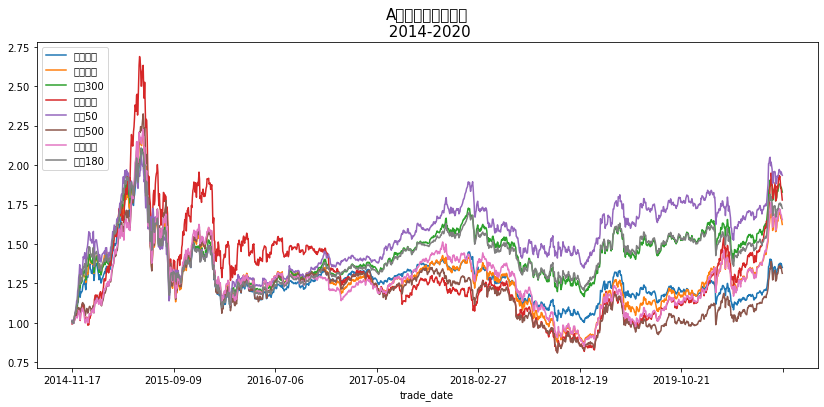

In [27]:
(index_data/index_data.iloc[1]).plot(figsize=(14,6))
plt.title('A股指数累积收益率\n 2014-2020',size=15)
plt.show()